In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
print(df.shape)
print(df.info())

(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 no

In [3]:
# Hence, we see that there are 16 columns and 48895 rows
# Missing values are there in columns: name, host_name, last_review, reviews_per_month. 
# ID, name and host_name column has no affect on Price. Hence can be removed
df1 = df.drop(['id', 'name', 'host_name'],axis=1)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 4.8+ MB
None


In [4]:
# now we have null values in last_review and reviews_per_month
df1.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# number of null values in last_review and reviews_per_months is same. hence there seems to be a relation. However, we cannot imput 
# last_review but we can for reviews_per_month
df1.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
df1.loc[df1['reviews_per_month'].isnull(),'reviews_per_month']=0
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 4.8+ MB


In [7]:
# remove last_review as we have dealt with reviews_per_month by imputing missing values with 0
df1 = df1.drop(['last_review'],axis = 1)
df1.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
# analyse the statistics of price group by neighbourhood. we observe there is minimum price as 0
df1.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [9]:
# analyse the statistics of minimum nights group by neighbourhood
df1.groupby('neighbourhood_group')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,4.560953,15.631792,1.0,1.0,2.0,3.0,365.0
Brooklyn,20104.0,6.056556,17.632726,1.0,2.0,3.0,5.0,999.0
Manhattan,21661.0,8.579151,24.050857,1.0,1.0,3.0,6.0,1250.0
Queens,5666.0,5.181433,15.028725,1.0,1.0,2.0,3.0,500.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


In [10]:
# As price cannot be 0 and minimum nights cannot be more than 365; hence we remove these rows
df1 = df1[df1['price']>0]
df1 = df1[df1['minimum_nights']<=365]
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48870 entries, 0 to 48894
Data columns (total 12 columns):
host_id                           48870 non-null int64
neighbourhood_group               48870 non-null object
neighbourhood                     48870 non-null object
latitude                          48870 non-null float64
longitude                         48870 non-null float64
room_type                         48870 non-null object
price                             48870 non-null int64
minimum_nights                    48870 non-null int64
number_of_reviews                 48870 non-null int64
reviews_per_month                 48870 non-null float64
calculated_host_listings_count    48870 non-null int64
availability_365                  48870 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.8+ MB


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [11]:
# analyse the statistics of availability_365 as per neighbourhood
df1.groupby('neighbourhood_group')['availability_365'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,165.794495,135.304079,0.0,37.0,148.0,313.75,365.0
Brooklyn,20089.0,100.159739,126.243695,0.0,0.0,28.0,188.00,365.0
Manhattan,21654.0,111.929667,132.641048,0.0,0.0,36.0,230.00,365.0
Queens,5664.0,144.422493,135.528910,0.0,2.0,98.0,286.00,365.0
Staten Island,373.0,199.678284,131.852000,0.0,78.0,219.0,333.00,365.0


In [12]:
# now data is ready for prediction. Calculate pairwise correlation matrix to see how 
#different variables are related to price
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1,0.02,0.13,0.015,-0.019,-0.14,0.21,0.15,0.2
latitude,0.02,1,0.085,0.034,0.03,-0.015,-0.019,0.02,-0.011
longitude,0.13,0.085,1,-0.15,-0.074,0.059,0.14,-0.11,0.083
price,0.015,0.034,-0.15,1,0.054,-0.048,-0.051,0.057,0.082
minimum_nights,-0.019,0.03,-0.074,0.054,1,-0.095,-0.15,0.16,0.16
number_of_reviews,-0.14,-0.015,0.059,-0.048,-0.095,1,0.59,-0.072,0.17
reviews_per_month,0.21,-0.019,0.14,-0.051,-0.15,0.59,1,-0.047,0.16
calculated_host_listings_count,0.15,0.02,-0.11,0.057,0.16,-0.072,-0.047,1,0.23
availability_365,0.2,-0.011,0.083,0.082,0.16,0.17,0.16,0.23,1


In [13]:
# one hot encoding for categorical variables using get dummies
df1 = pd.get_dummies(df1,prefix_sep='_', drop_first=True)
df1.head()




,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365,1,...,0,0,0,0,0,0,0,0,1,0
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355,0,...,0,0,0,0,0,0,0,0,0,0
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365,0,...,0,0,0,0,0,0,0,0,1,0
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194,1,...,0,0,0,0,0,0,0,0,0,0
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# VIF calculation
# pd.DataFrame(np.linalg.inv(df1.corr().values), index = corr.index, columns=corr.columns)

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)



,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.269276,-0.018199,-0.115148,-0.012748,0.050964,0.524971,-0.523048,-0.152586,-0.226645
latitude,-0.018199,1.013056,-0.102948,-0.048133,-0.033867,-0.012066,0.029345,-0.028241,0.036413
longitude,-0.115148,-0.102948,1.090435,0.162310,0.054185,0.018598,-0.098143,0.148636,-0.110921
price,-0.012748,-0.048133,0.162310,1.038969,-0.017230,0.040106,0.021986,-0.008342,-0.102238
minimum_nights,0.050964,-0.033867,0.054185,-0.017230,1.084169,0.048498,0.139856,-0.120683,-0.196226
number_of_reviews,0.524971,-0.012066,0.018598,0.040106,0.048498,1.778933,-1.108057,0.044738,-0.254619
reviews_per_month,-0.523048,0.029345,-0.098143,0.021986,0.139856,-1.108057,1.806041,0.056984,-0.028035
calculated_host_listings_count,-0.152586,-0.028241,0.148636,-0.008342,-0.120683,0.044738,0.056984,1.119305,-0.230878
availability_365,-0.226645,0.036413,-0.110921,-0.102238,-0.196226,-0.254619,-0.028035,-0.230878,1.196992


In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df1.drop('price', axis=1)
print(X.head())

Price = df1['price']
#Features_train, Features_test, Price_train, Price_test = train_test_split(Features, Price, test_size=0.30, random_state=42)
X_train, X_test, Price_train, Price_test = train_test_split(X, Price, test_size=0.3, random_state=42)

   host_id  latitude  longitude  minimum_nights  number_of_reviews  \
0     2787  40.64749  -73.97237               1                  9   
1     2845  40.75362  -73.98377               1                 45   
2     4632  40.80902  -73.94190               3                  0   
3     4869  40.68514  -73.95976               1                270   
4     7192  40.79851  -73.94399              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  ...  \
0                             1                              0 

In [16]:
print("X", X.shape)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X (48870, 234)
X_train: (34209, 234)
X_test: (14661, 234)


In [27]:
from sklearn.linear_model import LinearRegression
from math import sqrt

print("\nLINEAR (subset)")
rgr = LinearRegression(normalize=True)
rgr.fit(X_train, Price_train)
print("model:", rgr)
print("coeffs:", rgr.coef_)
print("intercept:", rgr.intercept_)

#Evaluate the predictions of the model
Price_predictions_regression = rgr.predict(X_test)
print('R squared:', rgr.score(X_test, Price_test))
print(Price_predictions_regression[:10])
print(Price_test[:10])
mse = np.mean((Price_predictions_regression - Price_test)**2)
print('MSE:', mse)

error = sqrt(mse) #calculate rmse
print('RMSE value = ', error)



Price_predictions_regression




LINEAR (subset)
model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
coeffs: [ 8.76508627e-08 -8.65698229e+01 -8.98307383e+02 -2.83912192e-01
 -1.73805458e-01 -3.83398659e+00 -2.25655720e-01  2.00095977e-01
  6.07057578e+14 -1.19041251e+15 -1.59298434e+15  3.07492672e+15
 -3.07492672e+15 -3.07492672e+15  1.59298434e+15  1.59298434e+15
 -6.07057578e+14  1.19041251e+15 -6.07057578e+14  1.59298434e+15
 -3.07492672e+15 -1.72573566e+01  1.59298434e+15  1.59298434e+15
 -6.07057578e+14  1.59298434e+15  1.59298434e+15 -2.57303856e+01
 -6.07057578e+14 -6.07057578e+14 -6.07057578e+14 -6.07057578e+14
  1.59298434e+15  1.59298434e+15 -6.07057578e+14 -5.85588996e+01
 -6.07057578e+14 -6.07057578e+14 -3.07492672e+15 -6.07057578e+14
  1.59298434e+15 -6.07057578e+14 -6.07057578e+14 -4.07263387e+01
 -3.07492672e+15  1.19041251e+15  1.19041251e+15  2.10322207e+02
  1.19041251e+15 -4.78658489e+01  7.78022175e+00 -3.07492672e+15
 -6.07057578e+14  3.15004604e+01 -6.07057578

array([120.22620445, 227.96951323, 333.96951323, ..., 278.21951323,
        48.35120445, 272.21951323])

In [28]:
print("\n\nRIDGE")
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(X_train, Price_train)
print("model:", ridge)
print("ridge coeffs:", ridge.coef_)
print("ridge intercept:", ridge.intercept_)
Price_predictions = ridge.predict(X_test)
print('Ridge R squared:', ridge.score(X_test, Price_test))
print(Price_predictions_regression[:10])
print(Price_test[:10])

# calculating mse

mse = np.mean((Price_predictions - Price_test)**2)
print('MSE:', mse)
print('RMSE:', sqrt(mse))





RIDGE
model: Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
ridge coeffs: [ 8.82793222e-08 -2.21601215e+01 -8.45440590e+02 -2.54199420e-01
 -1.77531248e-01 -3.79613957e+00 -2.16848238e-01  1.96572209e-01
 -2.27205617e+01  1.15884879e+00  2.77588289e+00 -9.87716957e+01
 -2.21727784e+02 -7.43139946e+01  1.07871280e+02 -2.93309949e+01
 -1.22460485e+02  4.71761540e+01 -5.88267639e+01  9.14259494e+01
 -1.66478176e+02 -1.50530288e+01  1.55546348e+02  7.04600080e+01
 -1.46490241e+01  1.68956440e+02  1.13752169e+02 -1.22914948e+01
 -1.03245658e+02 -4.05931658e+01 -7.54292924e+00 -9.99148941e+01
  1.38304244e+02  5.76273818e+01 -6.87923939e+01 -4.53673706e+01
  1.31254137e+01 -1.71461057e+01 -1.67309850e+02 -5.56041464e+00
  1.08794194e+02 -1.70220559e+01 -2.58194596e+01 -3.55649299e+01
 -1.17187874e+02  2.76867068e+01 -4.03781165e+01  2.18546113e+02
 -2.76867990e+01 -3.76119998e+01  1.02646481e+01 -1.02087

In [29]:
print("\n\nLASSO")
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, Price_train)
print(lasso)
print("Lasso coeffs:", lasso.coef_)
print("Lasso intercept:", lasso.intercept_)
Price_predictions = lasso.predict(X_test)
print('Lasso R squared:', lasso.score(X_test, Price_test))
print(Price_predictions[:10])
print(Price_test[:10])

# MSE
mse = np.mean((Price_predictions - Price_test)**2)
print('MSE:', mse)
print('RMSE:', sqrt(mse))



LASSO
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso coeffs: [ 8.33795227e-08 -0.00000000e+00 -4.85060130e+02 -2.36174695e-01
 -1.76744017e-01 -3.63874399e+00 -1.98335404e-01  1.93665123e-01
 -0.00000000e+00  4.05928250e+01  4.97312772e+00 -1.16249805e+02
 -6.00983328e+01  2.03671082e+01  8.69353981e+01 -3.49765081e+00
 -7.42903079e+01  6.51663327e+01 -9.99412221e+00  4.84117570e+01
 -1.42419247e+01 -9.98047146e-01  1.19993030e+02  3.29340139e+01
 -1.23793388e+00  1.47510906e+02  5.97899012e+01  0.00000000e+00
 -6.41281658e+01 -2.59311584e+01  1.82794407e+01 -6.16757163e+01
  1.30671393e+02  4.00058353e+01 -4.09573369e+01 -3.05023288e+01
  4.20364698e+01 -7.71894155e+00 -1.06968721e+01  0.00000000e+00
  6.16642811e+01 -1.30564127e+01  4.63469615e+00 -2.13352821e+01
  0.00000000e+00  4.20042275e+01 -2.34149517e+01  1.84679972e+02


In [30]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV




In [31]:
pipelines = {
    "rf": make_pipeline(StandardScaler(), ensemble.RandomForestRegressor(random_state=123)),
    "gb": make_pipeline(StandardScaler(), ensemble.GradientBoostingRegressor(random_state=123))
}




In [32]:
rf_hyperparameters = {
    "randomforestregressor__n_estimators": [100, 200],
    "randomforestregressor__max_features": ["auto", "sqrt", 0.33]
}
gb_hyperparameters = {
    "gradientboostingregressor__n_estimators": [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}
hyperparameters = {"rf": rf_hyperparameters,
                   "gb": gb_hyperparameters}


In [33]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1, verbose= 10)
    model.fit(X_train, Price_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 20.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 20.9min finished


rf has been fitted.
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 36

gb has been fitted.


In [34]:
 for name, model in fitted_models.items():
    print(name)
    print("-----------")
    pred = model.predict(X_test)
    #print('MAE:', mean_absolute_error(Price_test, pred))
    print("MSE:", "\n", mean_squared_error(Price_test, pred))
    error = sqrt(mean_squared_error(Price_test,pred)) #calculate rmse
    
    print('RMSE value = ', error)

rf
-----------
MSE: 
 58949.341767404076
RMSE value =  242.79485531494294
gb
-----------
MSE: 
 60341.60250802791
RMSE value =  245.64527780526925


In [35]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)



In [36]:
#import required packages
from sklearn import neighbors
#from math import sqrt
%matplotlib inline

In [37]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Price_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Price_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 286.88992560102815
RMSE value for k=  2 is: 271.3782823039978
RMSE value for k=  3 is: 265.95485697598514
RMSE value for k=  4 is: 260.4172554935025
RMSE value for k=  5 is: 259.11662093083964
RMSE value for k=  6 is: 256.8785331633565
RMSE value for k=  7 is: 255.71806114478835
RMSE value for k=  8 is: 254.82016170550077
RMSE value for k=  9 is: 254.4611988478765
RMSE value for k=  10 is: 253.6005754103122
RMSE value for k=  11 is: 253.0595904628727
RMSE value for k=  12 is: 252.4524925332532
RMSE value for k=  13 is: 251.6753174769717
RMSE value for k=  14 is: 251.61706694603356
RMSE value for k=  15 is: 251.40731016673269
RMSE value for k=  16 is: 251.2873157227645
RMSE value for k=  17 is: 251.1260835051173
RMSE value for k=  18 is: 251.0087411664528
RMSE value for k=  19 is: 250.96628746328514
RMSE value for k=  20 is: 250.64195347546223


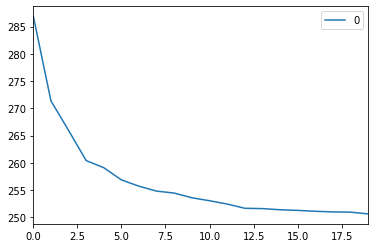

In [38]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
